In [47]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob
sns.set(style="whitegrid", font_scale=1.6)
%matplotlib inline

In [48]:
def read_test_result(fname):
    _d = pd.read_json(fname)
    _d['zone'] = fname[:2]
    return _d

In [49]:
S_DATES = [('CL', '2018-07-24'),
          ('CZ', '2018-05-30'),
          ('NU', '2018-07-20'),
          ('NZ', '2018-07-26'),
          ('SE', '2018-07-24'),
          ('ROOT', '2018-08-17')]

In [50]:
def gen_res_fnames(prefix):
    return ["{0[0]}/{0[0]}-{1}-{0[1]}.json".format(e, prefix) for e in S_DATES]

In [51]:
gen_res_fnames("domain-test-results")

['CL/CL-domain-test-results-2018-07-24.json',
 'CZ/CZ-domain-test-results-2018-05-30.json',
 'NU/NU-domain-test-results-2018-07-20.json',
 'NZ/NZ-domain-test-results-2018-07-26.json',
 'SE/SE-domain-test-results-2018-07-24.json',
 'ROOT/ROOT-domain-test-results-2018-08-17.json']

In [52]:
# Read the general DNS stats
# d1 = pd.concat([read_test_result(f) for f in glob.glob('*/*-domain-test-results-2018-??-??.json')])
d1 = pd.concat([read_test_result(f) for f in gen_res_fnames("domain-test-results")])

In [53]:
d1.head()

,domain,error_type,perc,test,zone
0,35,Other,0.129654,dns,CL
1,407,noaa,1.507687,dns,CL
2,608,nosoa,2.252269,dns,CL
3,25740,ok,95.350991,dns,CL
4,46,refused,0.170402,dns,CL


In [54]:
d1.sort_values(by='perc', ascending=False)['error_type'].unique()

array(['ok', 'nosoa', 'noaa', 'timeout', 'Other', 'refused', 'servfail',
       'rd'], dtype=object)

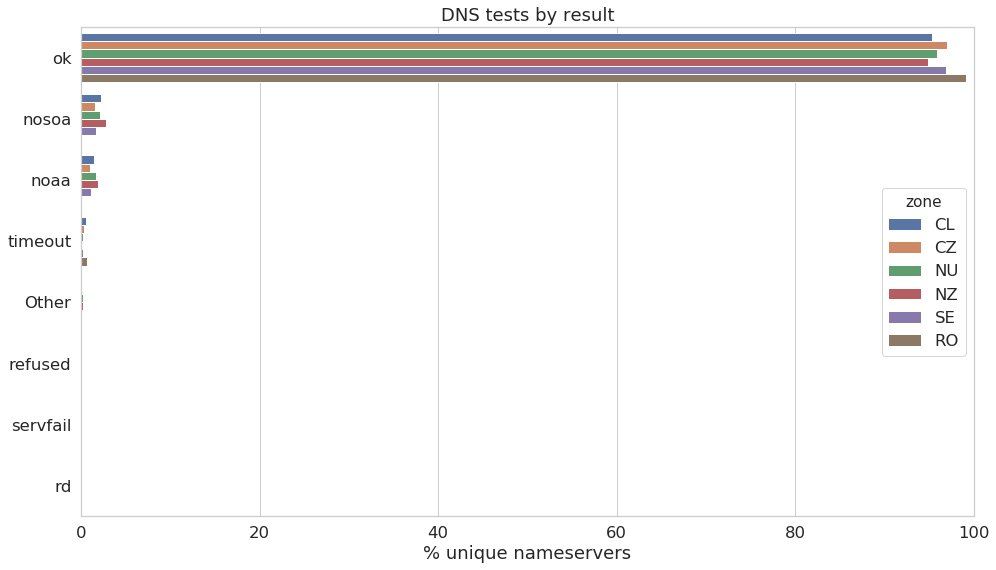

In [55]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.5)
ax = sns.barplot(data=d1, x='perc', y='error_type', hue='zone',
                 order=d1.sort_values(by='perc', ascending=False)['error_type'].unique())
ax.set(xlim=[0, 100], title='DNS tests by result', ylabel='', xlabel='% unique nameservers')
plt.savefig('comparison-basic-DNS-test.png')

In [56]:
# Compare DNS vs EDNS results
d2 = pd.concat([read_test_result(f) for f in gen_res_fnames("DNS-EDNS")])

In [57]:
d2

,domain,error_type,perc,test,zone
0,25740,ok,100.000000,dns,CL
1,25129,ok,96.683467,edns,CL
2,570,noopt,2.193067,edns,CL
3,248,nsid,0.954176,edns,CL
4,44,Other,0.169289,edns,CL
0,23939,ok,100.000000,dns,CZ
1,23214,ok,95.475858,edns,CZ
2,697,noopt,2.866661,edns,CZ
3,375,nsid,1.542321,edns,CZ
4,28,Other,0.115160,edns,CZ


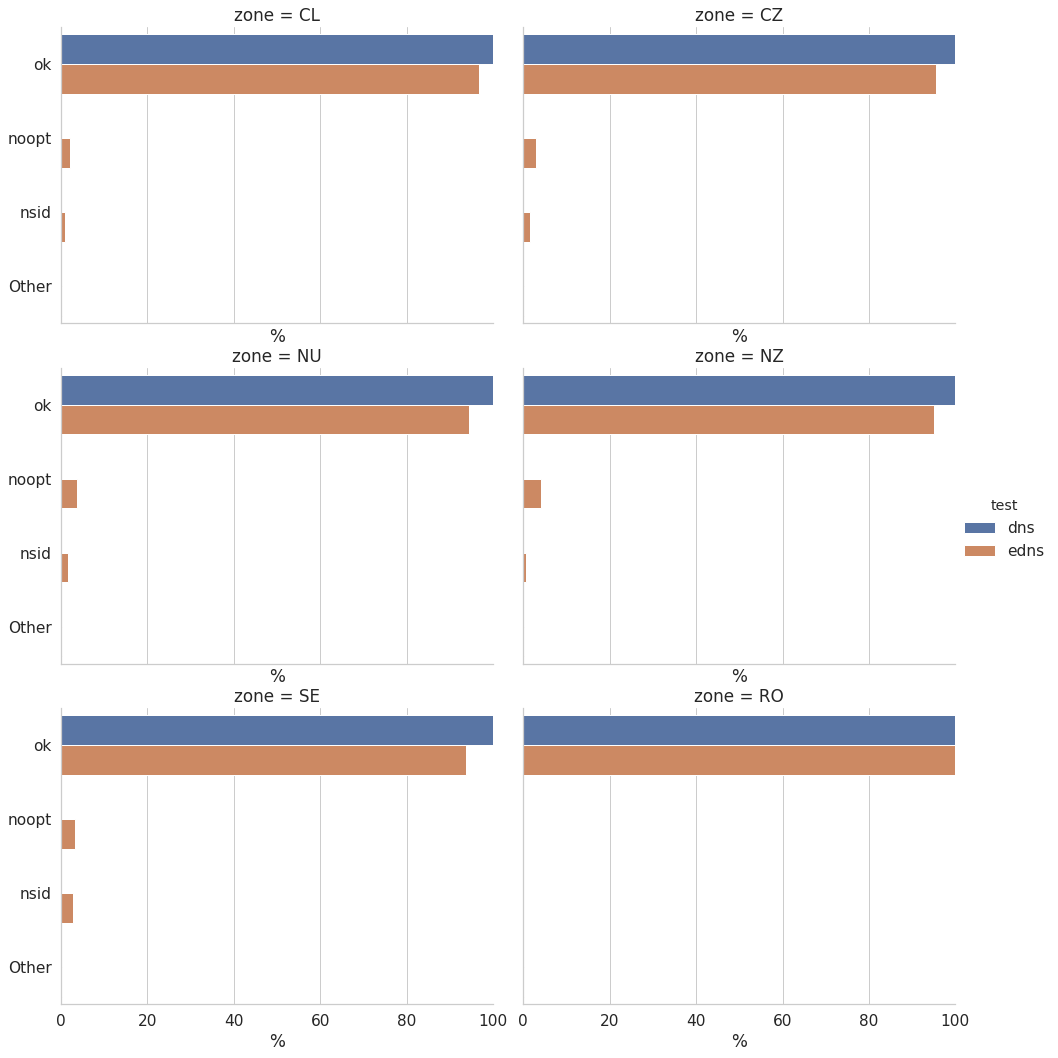

In [58]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.4)
ax = sns.catplot(data=d2, x='perc', y='error_type', hue='test', col='zone', kind='bar', col_wrap=2,
                 order=d2.sort_values(by='perc', ascending=False)['error_type'].unique(),
                   aspect=1.4)
ax.set(xlim=[0, 100], ylabel='', xlabel='%')
plt.savefig('comparison-DNS-EDNS.png')

In [59]:
# Compare EDNS with EDNS1
d3 = pd.concat([read_test_result(f) for f in gen_res_fnames('EDNS-EDNS1')])

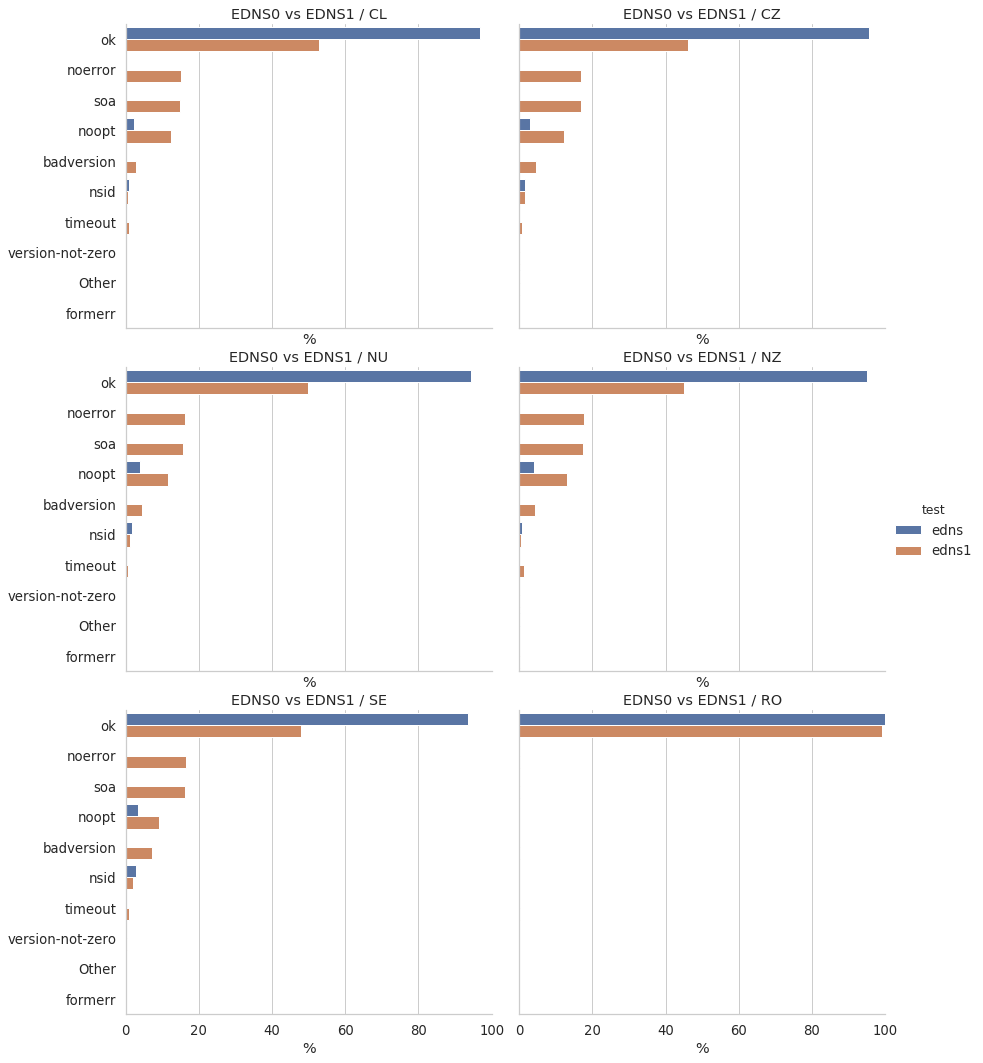

In [60]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.catplot(data=d3, x='perc', y='error_type', hue='test', col='zone', kind='bar', col_wrap=2,
                 order=d3.sort_values(by='perc', ascending=False)['error_type'].unique(),
                   aspect=1.3)
ax.set(xlim=[0, 100], ylabel='', xlabel='%').set_titles("EDNS0 vs EDNS1 / {col_name}")
plt.savefig('comparison-EDNS-EDNS1.png')

In [61]:
# Compare EDNS0 with EDNS1
d4 = pd.concat([read_test_result(f) for f in gen_res_fnames('EDNS1-EDNS1OPT')])

/opt/a/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


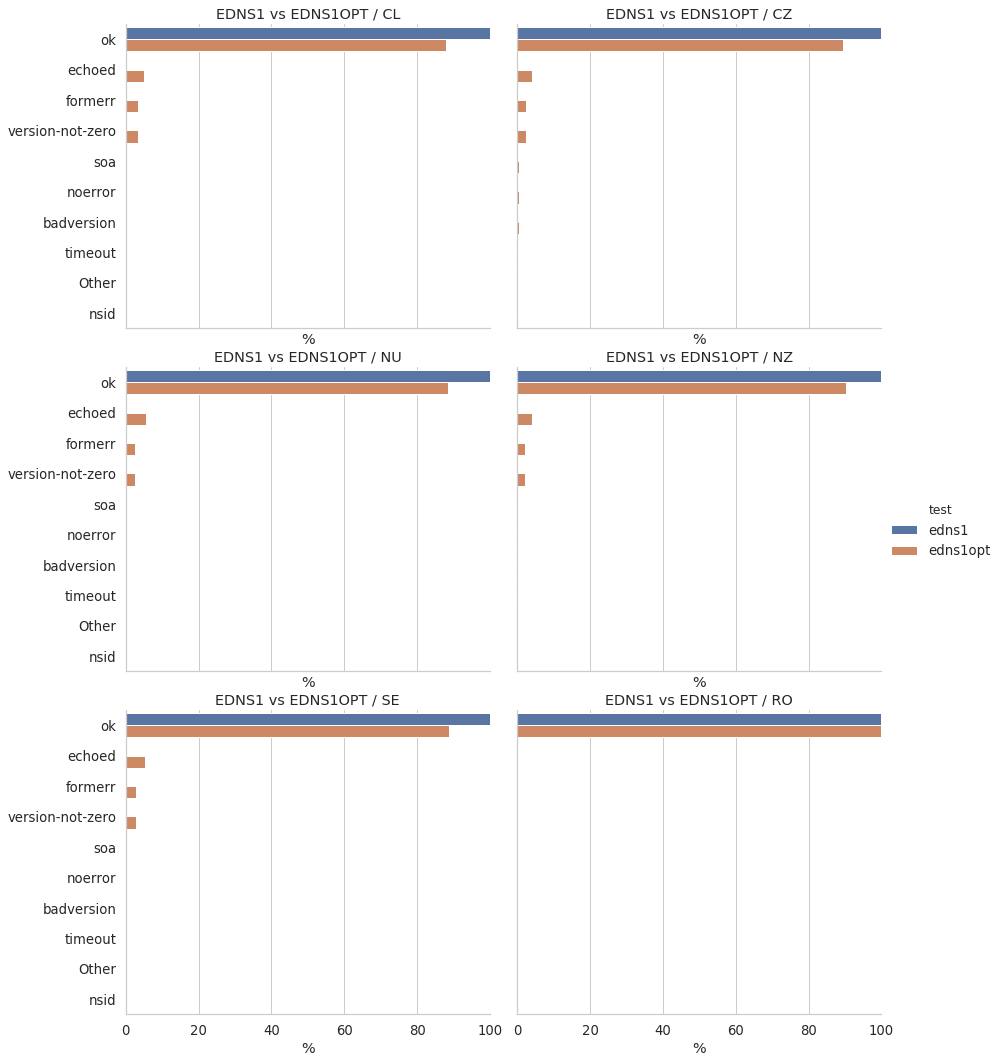

In [62]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.factorplot(data=d4, x='perc', y='error_type', hue='test', col='zone', kind='bar', col_wrap=2,
                 order=d4.sort_values(by='perc', ascending=False)['error_type'].unique(),
                   aspect=1.3)
ax.set(xlim=[0, 100], ylabel='', xlabel='%').set_titles("EDNS1 vs EDNS1OPT / {col_name}")
plt.savefig('comparison-EDNS1-EDNS1OPT.png')

In [63]:
# Compare EDNS vs DO
d5 = pd.concat([read_test_result(f) for f in gen_res_fnames('DO-EDNS')])

/opt/a/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


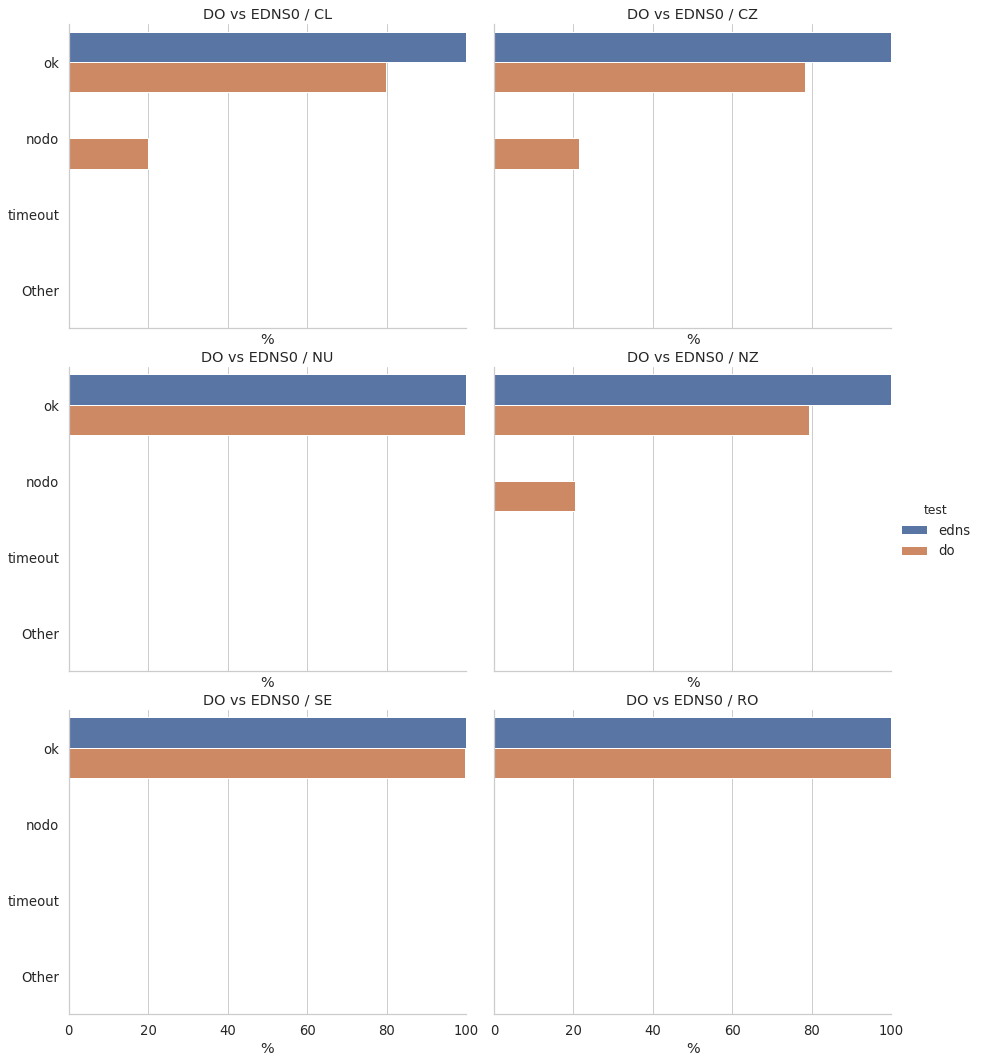

In [64]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.factorplot(data=d5, x='perc', y='error_type', hue='test', col='zone', kind='bar', col_wrap=2,
                 order=d5.sort_values(by='perc', ascending=False)['error_type'].unique(),
                   aspect=1.3)
ax.set(xlim=[0, 100], ylabel='', xlabel='%').set_titles("DO vs EDNS0 / {col_name}")
plt.savefig('comparison-DO-EDNS.png')

In [65]:
# Compare DO vs EDNSTCP vs EDNS@512
d6 = pd.concat([read_test_result(f) for f in gen_res_fnames('do-ednstcp-edns512')])

In [66]:
d6

,domain,error_type,perc,test,zone
0,19891,ok,100.000000,do,CL
1,19203,ok,96.463556,ednstcp,CL
2,492,timeout,2.471492,ednstcp,CL
3,103,connection-refused,0.517406,ednstcp,CL
4,69,Other,0.346612,ednstcp,CL
5,40,failed,0.200934,ednstcp,CL
6,19867,ok,99.879342,edns@512,CL
7,24,Other,0.120658,edns@512,CL
0,17872,ok,100.000000,do,CZ
1,17377,ok,97.197673,ednstcp,CZ


/opt/a/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


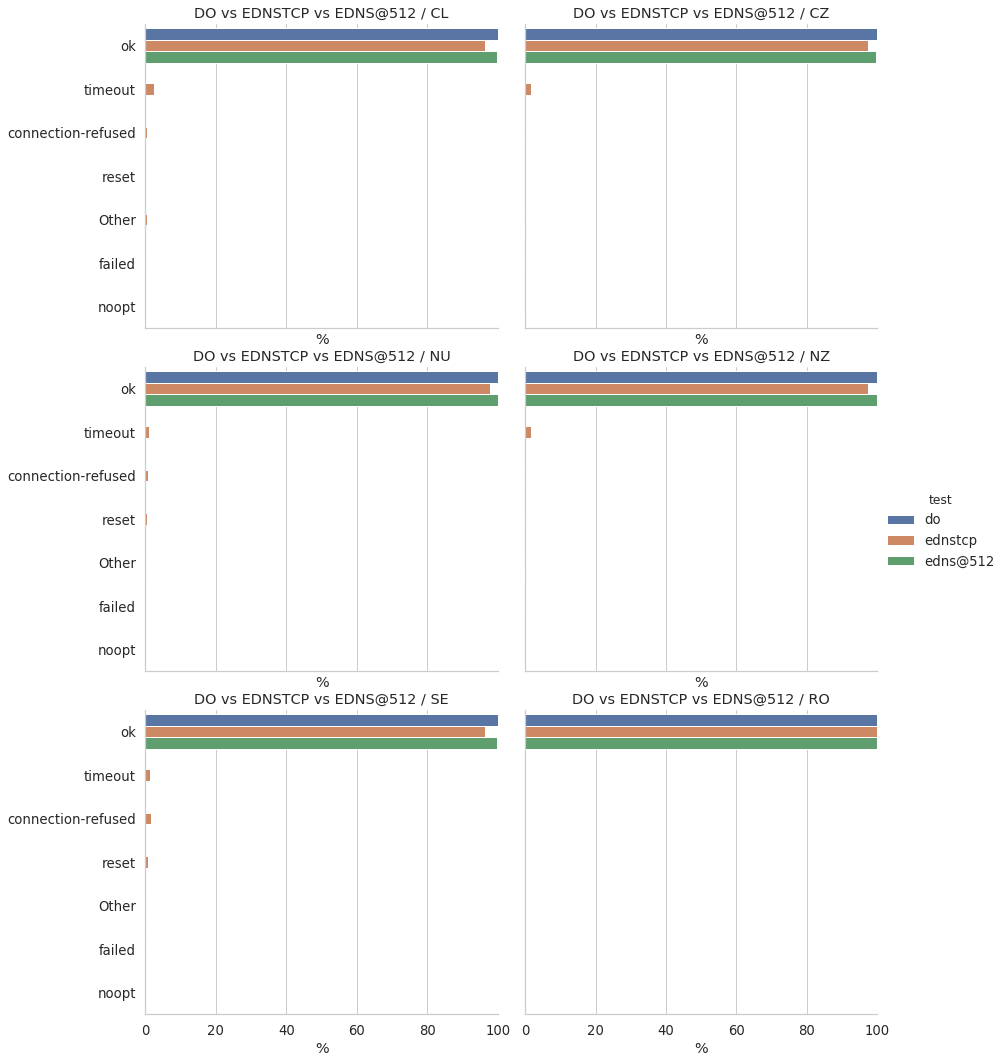

In [67]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.factorplot(data=d6, x='perc', y='error_type', hue='test', col='zone', kind='bar', col_wrap=2,
                 order=d6.sort_values(by='perc', ascending=False)['error_type'].unique(),
                   aspect=1.3)
ax.set(xlim=[0, 100], ylabel='', xlabel='%').set_titles("DO vs EDNSTCP vs EDNS@512 / {col_name}")
plt.savefig('comparison-DO-EDNSTCP-EDNS512.png')

In [68]:
# Compare EDNS vs EDNSflags
d7 = pd.concat([read_test_result(f) for f in gen_res_fnames('edns-ednsflags')])

/opt/a/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


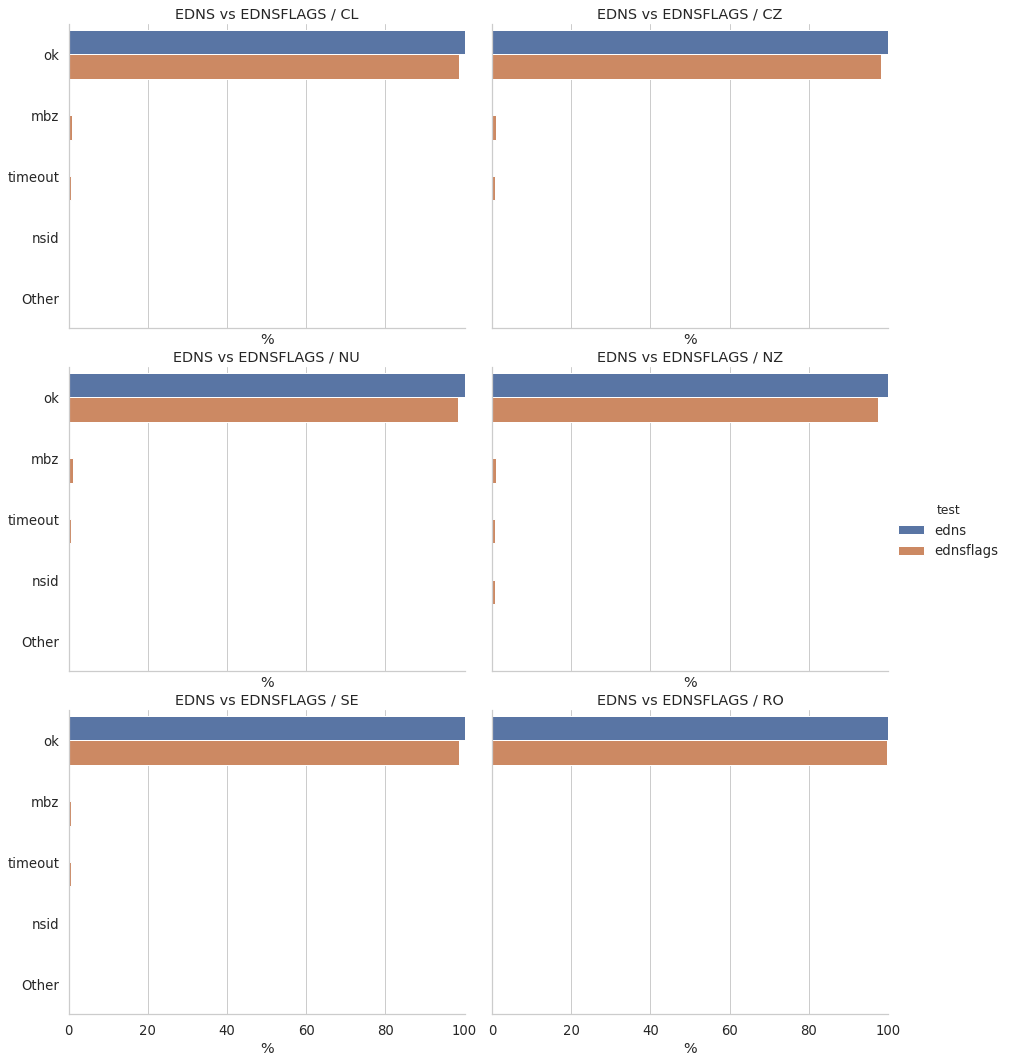

In [69]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.factorplot(data=d7, x='perc', y='error_type', hue='test', col='zone', kind='bar', col_wrap=2,
                 order=d7.sort_values(by='perc', ascending=False)['error_type'].unique(),
                   aspect=1.3)
ax.set(xlim=[0, 100], ylabel='', xlabel='%').set_titles("EDNS vs EDNSFLAGS / {col_name}")
plt.savefig('comparison-EDNS-EDNSFLAGS.png')

In [70]:
# Compare EDNS vs EDNSflags
d8 = pd.concat([read_test_result(f) for f in gen_res_fnames('edns-optlist')])

/opt/a/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


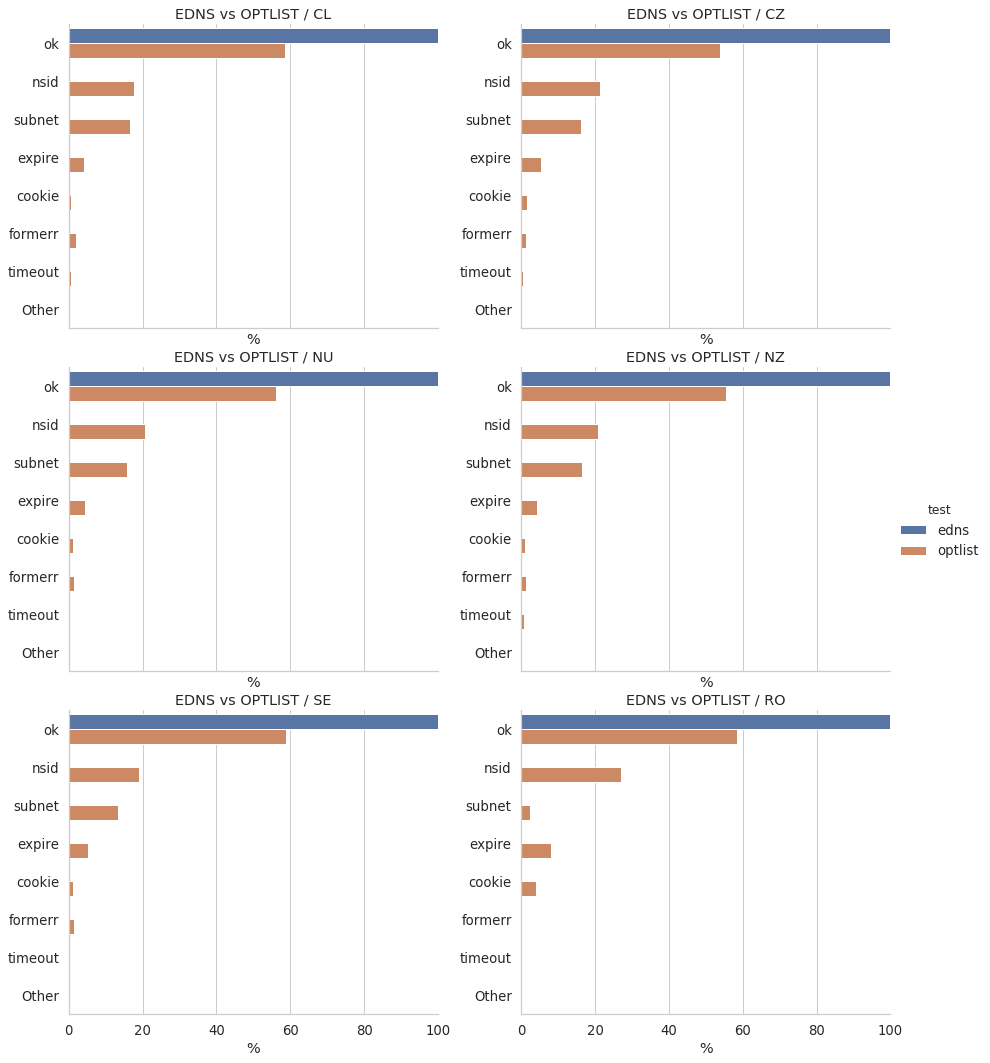

In [71]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.factorplot(data=d8, x='perc', y='error_type', hue='test', col='zone', kind='bar', col_wrap=2,
                 order=d8.sort_values(by='perc', ascending=False)['error_type'].unique(),
                   aspect=1.3, sharey=False, orient='h')
ax.set(xlim=[0, 100], ylabel='', xlabel='%').set_titles("EDNS vs OPTLIST / {col_name}")
plt.savefig('comparison-EDNS-OPTLIST.png')

In [72]:
# Load the server score histogram to compare
server_score = pd.concat([read_test_result(f) for f in gen_res_fnames('server-score-histogram')])

In [73]:
server_score.head(5)

,bin,fraction,fraction_cum,server_cnt,zone
0,[0.0-0.1),3.385474,3.385474,764,CL
1,[0.1-0.2),1.324944,4.710418,299,CL
2,[0.2-0.3),0.248150,4.958568,56,CL
3,[0.3-0.4),1.440156,6.398724,325,CL
4,[0.4-0.5),1.338237,7.736961,302,CL


Text(0.5,1,'Server score distribution')

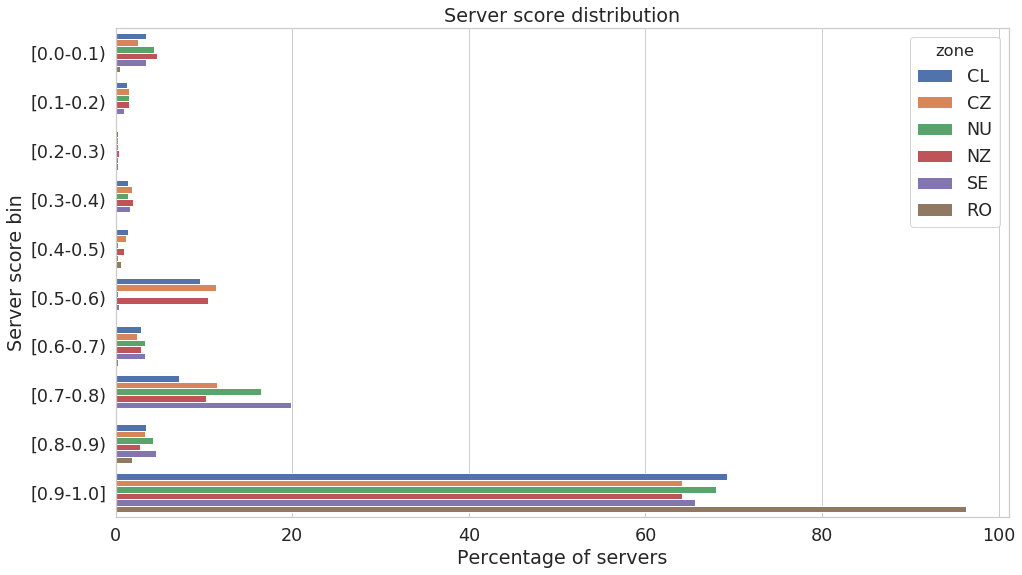

In [74]:
sns.set(style='whitegrid', font_scale=1.6)
plt.figure(figsize=(16,9))

ax = sns.barplot(data=server_score, x='fraction', y='bin', hue='zone', saturation=0.9)
ax.set_xlabel('Percentage of servers')
ax.set_ylabel('Server score bin')
ax.set_title('Server score distribution')

In [75]:
# Histogram per source address family
server_fam_score = pd.concat([read_test_result(f) for f in gen_res_fnames('server-score-histogram-per-address-family')])


In [76]:
server_fam_score.head(6)

,bin,family,fraction,fraction_cum,index,server_cnt,zone
0,[0.0-0.1),v4,3.387715,3.387715,0,760,CL
1,[0.1-0.2),v4,1.332798,4.720514,1,299,CL
10,[0.0-0.1),v6,0.750939,0.750939,0,30,CL
11,[0.1-0.2),v6,0.300375,1.051314,1,12,CL
12,[0.2-0.3),v6,0.050063,1.101377,2,2,CL
13,[0.3-0.4),v6,0.450563,1.551940,3,18,CL


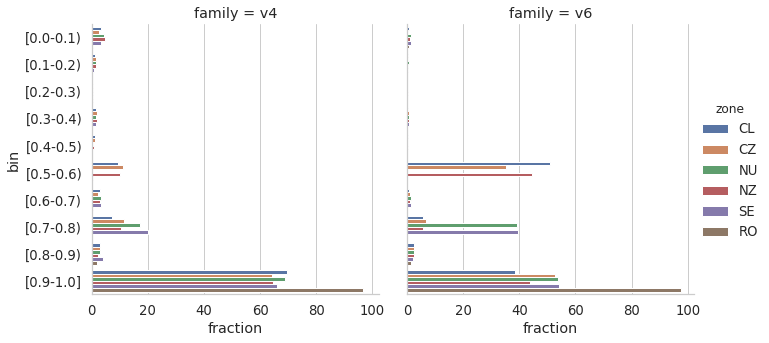

In [77]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.catplot(data=server_fam_score, x='fraction', y='bin', hue='zone', col='family', kind='bar',orient='h')
# ax.set(xlim=[0, 100], ylabel='', xlabel='%').set_titles("EDNS vs OPTLIST / {col_name}")
# plt.savefig('comparison-EDNS-OPTLIST.png')

In [78]:
# Histogram only for those servers that are dual-stacked
server_dual_score = pd.concat([read_test_result(f) for f in gen_res_fnames('dual-stack-server-score-histogram')])

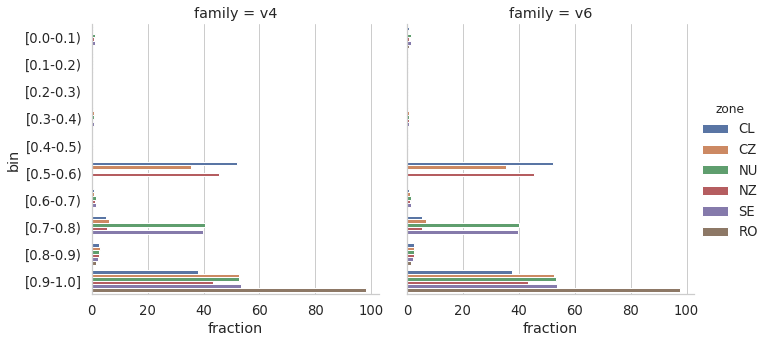

In [79]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.catplot(data=server_dual_score, x='fraction', y='bin', hue='zone', col='family', kind='bar',orient='h')
# ax.set(xlim=[0, 100], ylabel='', xlabel='%').set_titles("EDNS vs OPTLIST / {col_name}")
# plt.savefig('comparison-EDNS-OPTLIST.png')

In [80]:
# Comparing different metrics against ISC dataset
cm = pd.concat([read_test_result(f) for f in gen_res_fnames('comparative-metrics')])

In [81]:
cm

,domain,error_type,index,perc,test,zone
0,25129,ok,3,96.683467,edns,CL
1,23891,ok,4,89.378975,ednsopt,CL
2,19703,ok,6,52.911005,edns1,CL
3,19891,ok,2,79.944536,do,CL
4,7263,nsid,4,17.780988,optlist,CL
0,23214,ok,3,95.475858,edns,CZ
1,22311,ok,5,90.152740,ednsopt,CZ
2,17208,ok,5,46.276724,edns1,CZ
3,17872,ok,2,78.248687,do,CZ
4,8766,nsid,4,21.323798,optlist,CZ


/opt/a/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


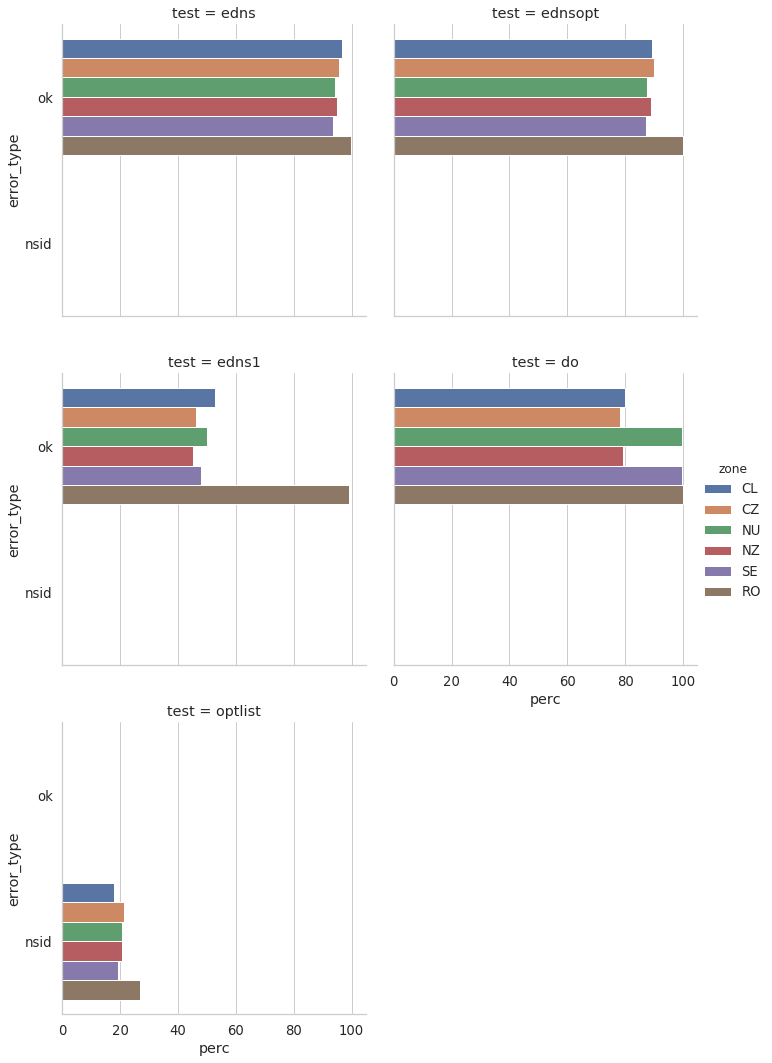

In [82]:
sns.factorplot(data=cm, y='error_type', x='perc', kind='bar', orient='h', hue='zone', col='test', col_wrap=2)

In [83]:
# General stats
gs = pd.concat([pd.read_json(f) for f in glob.glob('??-general-stats.json')])

In [84]:
gs

,Metric,Value,zone
0,# domains,9526,CZ
1,# servers,18630,CZ
2,# dual stack server,5506,CZ
3,# mismatch dual stack server,214,CZ
4,Unique addresses,24429,CZ
5,Unique v4 addresses,18722,CZ
6,Unique v6 addresses,5707,CZ
0,# domains,10837,NZ
1,# servers,21133,NZ
2,# dual stack server,4332,NZ


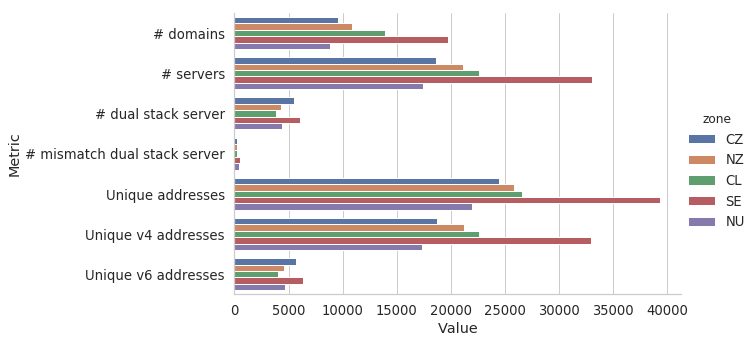

In [85]:
sns.catplot(data=gs, y='Metric', x='Value', hue='zone', kind='bar', orient='h', aspect=2)